In [351]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [326]:
df=pd.read_csv("vehicles.csv")
df

,Age,Gender,Income,Favorite Transport
0,5,female,NaN,bicycle
1,8,male,NaN,scooter
2,10,female,NaN,bicycle
3,14,male,NaN,metro
4,16,male,NaN,metro
5,18,female,NaN,metro
6,20,male,200.0,scooter
7,22,female,500.0,scooter
8,23,male,300.0,scooter
9,25,female,800.0,metro


In [327]:
df.dtypes

Age                     int64
Gender                 object
Income                float64
Favorite Transport     object
dtype: object

## Cleaning

In [328]:
df.isnull()

,Age,Gender,Income,Favorite Transport
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False
5,False,False,True,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [329]:
df.isnull().sum()

Age                   0
Gender                0
Income                6
Favorite Transport    0
dtype: int64

In [330]:
df["Income"].fillna(0.0,inplace=True)
df

,Age,Gender,Income,Favorite Transport
0,5,female,0.0,bicycle
1,8,male,0.0,scooter
2,10,female,0.0,bicycle
3,14,male,0.0,metro
4,16,male,0.0,metro
5,18,female,0.0,metro
6,20,male,200.0,scooter
7,22,female,500.0,scooter
8,23,male,300.0,scooter
9,25,female,800.0,metro


In [331]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Favorite Transport    0
dtype: int64

## Encoding

In [332]:
df['Gender'].unique()

array(['female', 'male'], dtype=object)

### Option 1

In [333]:
# df.replace(
#     {
#         'Gender':
#             {
#                 'male':0,
#                 'female':1
#             }

# },inplace=True
# )
df.head(8)

,Age,Gender,Income,Favorite Transport
0,5,female,0.0,bicycle
1,8,male,0.0,scooter
2,10,female,0.0,bicycle
3,14,male,0.0,metro
4,16,male,0.0,metro
5,18,female,0.0,metro
6,20,male,200.0,scooter
7,22,female,500.0,scooter


### Option 2 LabelEncoder

In [334]:
label_encoder=LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])

In [335]:
df.head(8)

,Age,Gender,Income,Favorite Transport
0,5,0,0.0,bicycle
1,8,1,0.0,scooter
2,10,0,0.0,bicycle
3,14,1,0.0,metro
4,16,1,0.0,metro
5,18,0,0.0,metro
6,20,1,200.0,scooter
7,22,0,500.0,scooter


In [336]:
df.dtypes

Age                     int64
Gender                  int32
Income                float64
Favorite Transport     object
dtype: object

## Model

In [337]:
X=df.drop(columns='Favorite Transport')
X.head(8)

,Age,Gender,Income
0,5,0,0.0
1,8,1,0.0
2,10,0,0.0
3,14,1,0.0
4,16,1,0.0
5,18,0,0.0
6,20,1,200.0
7,22,0,500.0


In [338]:
y=df['Favorite Transport']
y.head(8)

0    bicycle
1    scooter
2    bicycle
3      metro
4      metro
5      metro
6    scooter
7    scooter
Name: Favorite Transport, dtype: object

In [339]:
model=DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [340]:
model.fit(X,y)

DecisionTreeClassifier()

## Prediction

In [341]:
test_df=pd.DataFrame({
    'Age':[12,30,88],
    'Gender':[0,1,1],
    'Income':[0.,2000,100000]
})
test_df

,Age,Gender,Income
0,12,0,0.0
1,30,1,2000.0
2,88,1,100000.0


In [342]:
model.predict(test_df)

array(['bicycle', 'taxi', 'helicopter'], dtype=object)

## Exporting to the DOT file

In [343]:
tree.export_graphviz(model,out_file='decision_tree_model.dot',feature_names=['Age','Gender','Income'],filled=True,class_names=sorted(y.unique()))

## Evaluation

In [344]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X.shape

(26, 3)

In [345]:
X_train.shape

(20, 3)

In [346]:
X_test.shape

(6, 3)

In [347]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [348]:
X_test

,Age,Gender,Income
21,64,1,6500.0
20,59,0,5500.0
0,5,0,0.0
6,20,1,200.0
5,18,0,0.0
17,53,0,1300.0


In [349]:
predictions=model.predict(X_test)
predictions

array(['helicopter', 'car', 'bicycle', 'scooter', 'metro', 'taxi'],
      dtype=object)

In [350]:
model_accuracy_score=accuracy_score(y_test,predictions)
model_accuracy_score

0.8333333333333334

## Charts

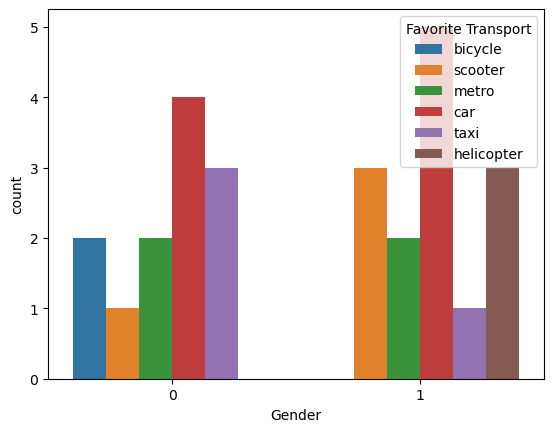

In [354]:
sns.countplot(x=df['Gender'],hue=df['Favorite Transport'])
plt.show()

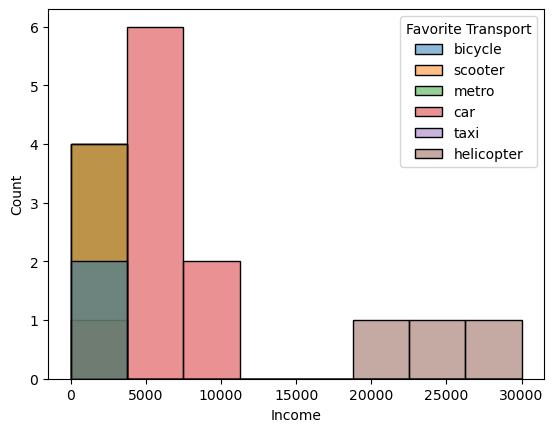

In [357]:
sns.histplot(x=df['Income'],hue=df['Favorite Transport'])
plt.show()